Рекуррентные блоки GRU. Пример их реализации в задаче сентимент-анализа | #25 нейросети на Python


In [57]:

import numpy as np
import os
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding,LSTM, GRU, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [58]:
with open('train_data_true', 'r', encoding='utf-8') as f:
    text_true = f.read() 
    text_true = text_true.replace('\ufeff', '')  

In [59]:
with open('train_data_false', 'r', encoding='utf-8') as f:
    text_false = f.read() 
    text_false = text_false.replace('\ufeff', '')  

In [60]:
texts = text_true.splitlines() + text_false.splitlines()
tokenizer.fit_on_texts(texts)
count_true = len(text_true.splitlines())
count_false = len(text_false.splitlines())
total_lines = count_true + count_false
print(count_false, count_true, total_lines)
data = tokenizer.texts_to_sequences(texts)
print(data[:5])  # Первые 5 последовательностей
assert len(x) == len(y), "Длина x и y не совпадает!"



88 84 172
[[197, 54, 2, 66, 3, 55, 198, 199, 200, 201], [4, 202, 203, 5, 204, 56, 205, 3, 67], [12, 4, 206, 3, 67, 102, 15, 207, 57, 4, 208, 209], [210, 211, 212, 3, 67, 213, 214, 215, 216, 217], [68, 58, 18, 218, 40, 41, 219, 220, 2, 221, 222, 223, 103]]


In [61]:
maxWordsCOunt = 10000
tokenizer = Tokenizer(num_words=maxWordsCOunt, filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(texts)

In [62]:
dist = list(tokenizer.word_counts.items())
print(dist[:10])
print(texts[0][:100])

[('думайте', 1), ('позитивно', 4), ('и', 50), ('верьте', 3), ('в', 38), ('свою', 4), ('способность', 1), ('достигать', 1), ('отличных', 1), ('результатов', 1)]
Думайте позитивно и верьте в свою способность достигать отличных результатов. 


In [63]:
max_text_len = 5
data = tokenizer.texts_to_sequences(texts)
data_pad = pad_sequences(data, maxlen=max_text_len)
print(data_pad)
print(list(tokenizer.word_index.items()))

[[ 55 198 199 200 201]
 [204  56 205   3  67]
 [207  57   4 208 209]
 [213 214 215 216 217]
 [  2 221 222 223 103]
 [225 226  28  32 227]
 [ 19 105 231 106  33]
 [109 233 234 110 111]
 [ 35   4 243  36  11]
 [118  43  22 119 246]
 [249 250 113 251 122]
 [257 258   3 259 260]
 [ 12  20  25  34 264]
 [ 72  60 269  72 270]
 [  3  22 126 273 274]
 [129  75 130 278  22]
 [282   1 283   1 284]
 [  9  10 286  19 287]
 [295   1 296   7 297]
 [  1  14 302   7 303]
 [  1  14 308   7 309]
 [ 12   4 134 313  77]
 [  4 134 317  55  13]
 [ 38   2 320 321 130]
 [135   5 137 322  13]
 [324 325 326   2 140]
 [327 328  18  32 329]
 [330  27 331  46 332]
 [334 124 335  16 336]
 [  1 345 346  80 347]
 [348 349  13   8 350]
 [ 13  54 352 144 128]
 [356 357   3  73 358]
 [  2 361  82   3  83]
 [125 364 365 366  11]
 [145 103  15 368 369]
 [ 30 373 374  14 375]
 [ 86   3 377 378  13]
 [389   9  47  82 390]
 [ 87 145 148  78  13]
 [133   4 149  55  13]
 [395   7   1   5 396]
 [400   7   1   5 401]
 [403 404 4

In [64]:
x = data_pad
y = np.array([[1, 0]]*count_true + [[0,1]]*count_false)
print(x.shape, y.shape)

(172, 5) (172, 2)


In [74]:
indices = np.arange(len(x))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]


In [75]:
model = Sequential()
model.add(Embedding(maxWordsCOunt, 128, input_length=max_text_len))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

history = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=32)


reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_16 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_17 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.5323 - loss: 0.6757 - val_accuracy: 0.6286 - val_loss: 0.6002
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9865 - loss: 0.2252 - val_accuracy: 0.7429 - val_loss: 1.3268
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.7714 - val_loss: 2.1749
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.7143 - val_loss: 2.7096
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 1.1739e-04 - val_accuracy: 0.6286 - val_loss: 3.1921
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9919 - loss: 0.0345 - val_accuracy: 0.7714 - val_loss: 1.8537
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8000 - val_loss: 1.9399
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 1.9411e-04 - val_accuracy: 0.7143 - val_loss

In [76]:
def sequence_to_text(list_of_indices):
    words = [reverse_word_map.get(index) for index in list_of_indices if index != 0]
    return(words)

t = 'Иногда лучшее, что ты можешь сделать'.lower()
data = tokenizer.texts_to_sequences([t])
data_pad = pad_sequences(data, maxlen=max_text_len)
print(sequence_to_text(data_pad[0]))


res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')

['лучшее', 'что', 'ты', 'можешь', 'сделать']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[9.9998891e-01 1.1099305e-05]]
0


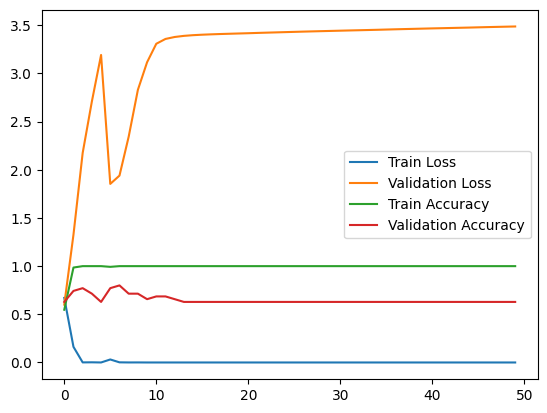

In [77]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

